In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

Data view - 

In [3]:
df = pd.read_csv('insurance.csv')
df 

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

Data summary statistic 

In [4]:
print(df.shape)


(1338, 7)


In [5]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [6]:
print(df.tail())

      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [8]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [9]:
df.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

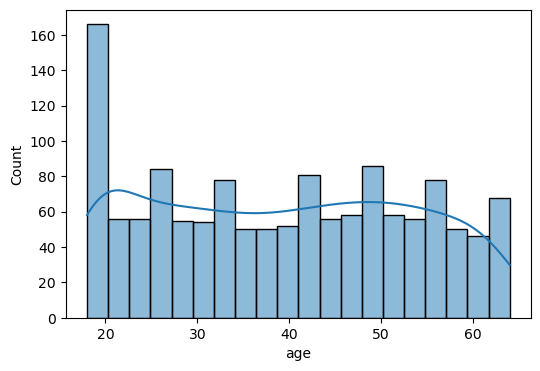

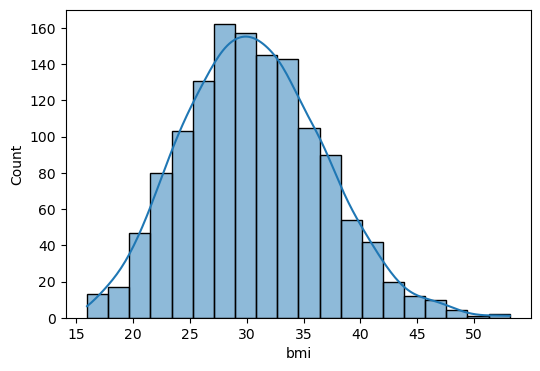

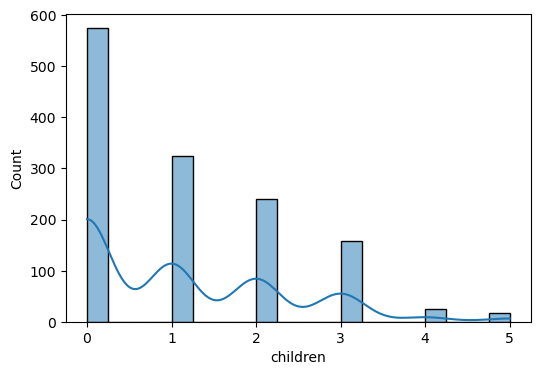

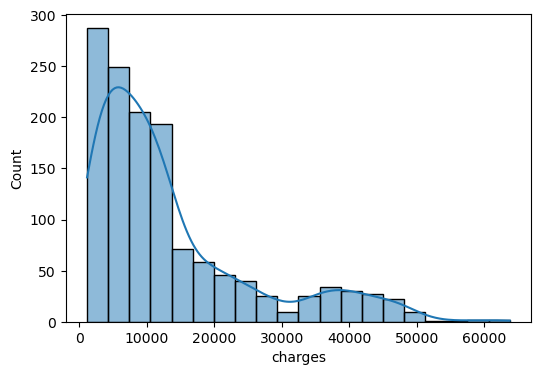

In [11]:
numeric_column = ['age', 'bmi', 'children', 'charges']
for i in numeric_column:
    plt.figure(figsize=(6,4))
    sns.histplot(
        df[i],kde=True , bins = 20 )
 

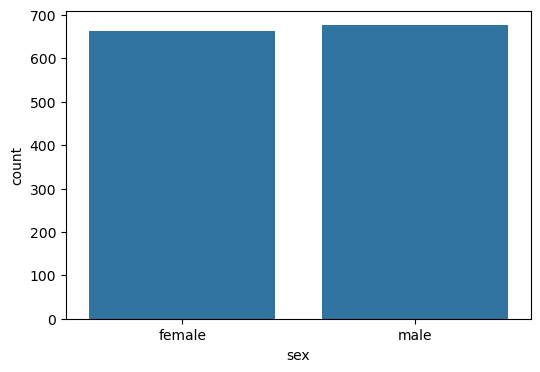

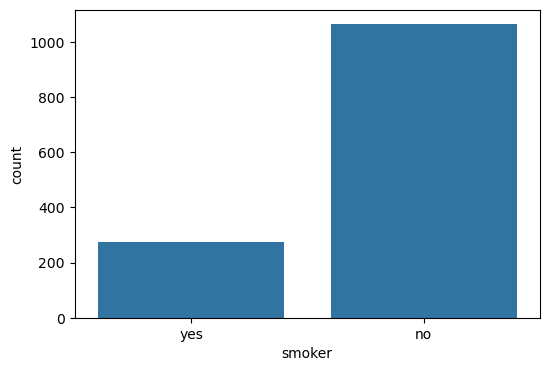

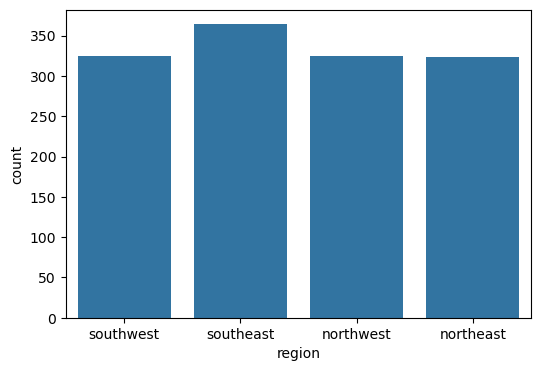

In [12]:
categorical = ['sex','smoker', 'region']
for i in categorical:
    plt.figure(figsize=(6,4))
    sns.countplot(x= df[i])

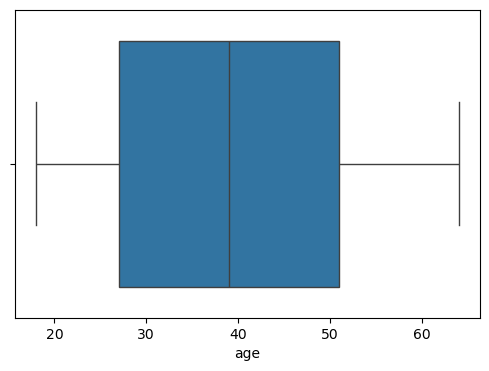

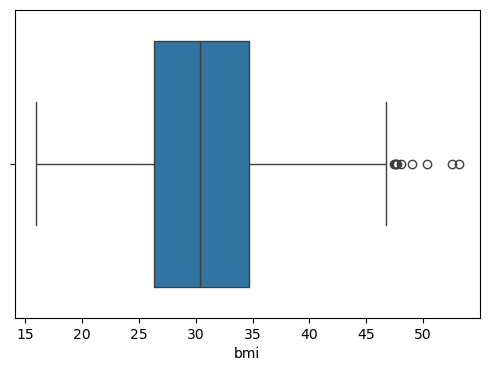

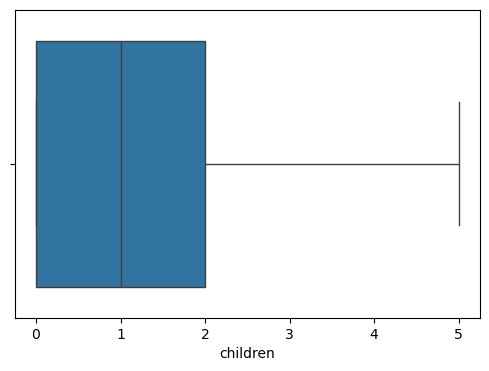

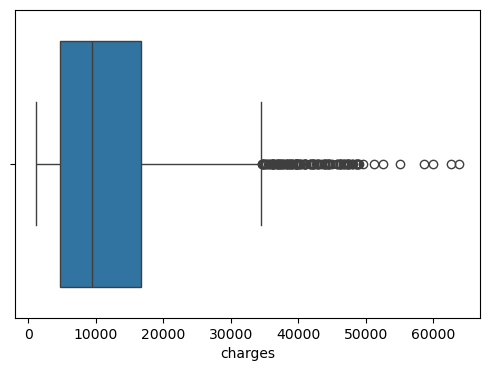

In [13]:
numeric_column
for i in numeric_column:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[i])

<Axes: >

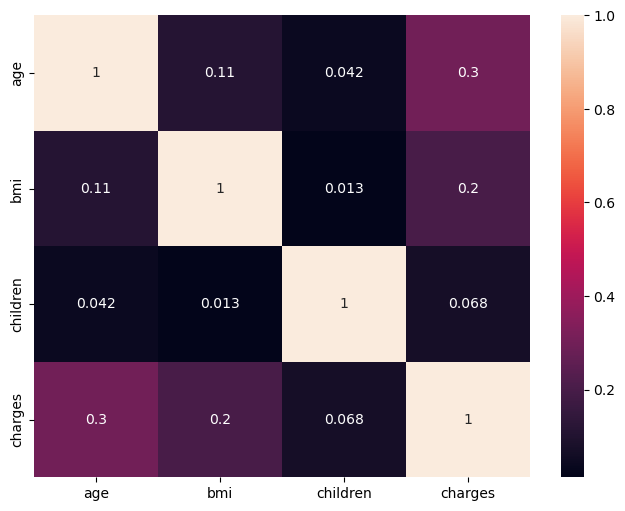

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True ), annot = True)

In [15]:
df_cleaned = df.copy() # data cleaning process 
df_cleaned.shape

(1338, 7)

In [16]:
df_cleaned.drop_duplicates(inplace=True) # i have removed the duplicate data 
df_cleaned.shape

(1337, 7)

In [17]:
df_cleaned.isnull().sum()  # there is no null value in the data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:

df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [19]:
df_cleaned["sex"].value_counts() # check wheter there are multiple gender or not Male ,male, m, M

sex
male      675
female    662
Name: count, dtype: int64

In [20]:
df_cleaned["sex"].unique()

array(['female', 'male'], dtype=object)

In [21]:
df_cleaned['sex']= df_cleaned['sex'].map({ "male": 0 , "female" : 1})


In [22]:
df_cleaned

age  sex     bmi  children smoker     region      charges
0      19    1  27.900         0    yes  southwest  16884.92400
1      18    0  33.770         1     no  southeast   1725.55230
2      28    0  33.000         3     no  southeast   4449.46200
3      33    0  22.705         0     no  northwest  21984.47061
4      32    0  28.880         0     no  northwest   3866.85520
...   ...  ...     ...       ...    ...        ...          ...
1333   50    0  30.970         3     no  northwest  10600.54830
1334   18    1  31.920         0     no  northeast   2205.98080
1335   18    1  36.850         0     no  southeast   1629.83350
1336   21    1  25.800         0     no  southwest   2007.94500
1337   61    1  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

In [23]:
df_cleaned["smoker"] = df_cleaned["smoker"].map({"yes":1,"no":0})

In [24]:
df_cleaned["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [25]:

df_cleaned = pd.get_dummies(df_cleaned , columns=['region'] )

In [26]:
df_cleaned

age  sex     bmi  children  smoker      charges  region_northeast  \
0      19    1  27.900         0       1  16884.92400             False   
1      18    0  33.770         1       0   1725.55230             False   
2      28    0  33.000         3       0   4449.46200             False   
3      33    0  22.705         0       0  21984.47061             False   
4      32    0  28.880         0       0   3866.85520             False   
...   ...  ...     ...       ...     ...          ...               ...   
1333   50    0  30.970         3       0  10600.54830             False   
1334   18    1  31.920         0       0   2205.98080              True   
1335   18    1  36.850         0       0   1629.83350             False   
1336   21    1  25.800         0       0   2007.94500             False   
1337   61    1  29.070         0       1  29141.36030             False   

      region_northwest  region_southeast  region_southwest  
0                False             False              True  
1                False              True             False  
2                False              True             False  
3                 True             False             False  
4                 True             False             False  
...                ...               ...               ...  
1333              True             False             False  
1334             False             False             False  
1335             False              True             False  
1336             False             False              True  
1337              True             False             False  

[1337 rows x 10 columns]

In [27]:
df_cleaned = df_cleaned.rename(columns={
    "sex":"is_female",
    "smoker" : "is_smoker"
})

In [28]:
df_cleaned.astype(int)
df_cleaned

age  is_female     bmi  children  is_smoker      charges  \
0      19          1  27.900         0          1  16884.92400   
1      18          0  33.770         1          0   1725.55230   
2      28          0  33.000         3          0   4449.46200   
3      33          0  22.705         0          0  21984.47061   
4      32          0  28.880         0          0   3866.85520   
...   ...        ...     ...       ...        ...          ...   
1333   50          0  30.970         3          0  10600.54830   
1334   18          1  31.920         0          0   2205.98080   
1335   18          1  36.850         0          0   1629.83350   
1336   21          1  25.800         0          0   2007.94500   
1337   61          1  29.070         0          1  29141.36030   

      region_northeast  region_northwest  region_southeast  region_southwest  
0                False             False             False              True  
1                False             False              True             False  
2                False             False              True             False  
3                False              True             False             False  
4                False              True             False             False  
...                ...               ...               ...               ...  
1333             False              True             False             False  
1334              True             False             False             False  
1335             False             False              True             False  
1336             False             False             False              True  
1337             False              True             False             False  

[1337 rows x 10 columns]

In [29]:
print(type([list])is list)

True


feature engineering


<Axes: xlabel='bmi', ylabel='Count'>

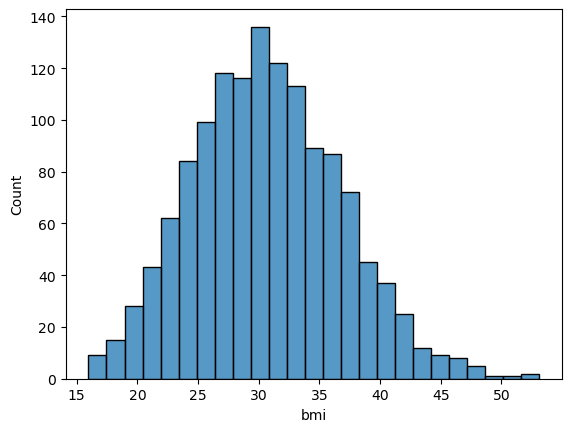

In [30]:
sns.histplot(df["bmi"])

In [31]:
df_cleaned["bmi_category"] = pd.cut(
    df_cleaned["bmi"],
    bins = [0,18.5,24.9,29.9,float("inf")],
    labels = ['Underweight',"Normal","Overweight","Obese"]


)

In [32]:
df_cleaned

age  is_female     bmi  children  is_smoker      charges  \
0      19          1  27.900         0          1  16884.92400   
1      18          0  33.770         1          0   1725.55230   
2      28          0  33.000         3          0   4449.46200   
3      33          0  22.705         0          0  21984.47061   
4      32          0  28.880         0          0   3866.85520   
...   ...        ...     ...       ...        ...          ...   
1333   50          0  30.970         3          0  10600.54830   
1334   18          1  31.920         0          0   2205.98080   
1335   18          1  36.850         0          0   1629.83350   
1336   21          1  25.800         0          0   2007.94500   
1337   61          1  29.070         0          1  29141.36030   

      region_northeast  region_northwest  region_southeast  region_southwest  \
0                False             False             False              True   
1                False             False              True             False   
2                False             False              True             False   
3                False              True             False             False   
4                False              True             False             False   
...                ...               ...               ...               ...   
1333             False              True             False             False   
1334              True             False             False             False   
1335             False             False              True             False   
1336             False             False             False              True   
1337             False              True             False             False   

     bmi_category  
0      Overweight  
1           Obese  
2           Obese  
3          Normal  
4      Overweight  
...           ...  
1333        Obese  
1334        Obese  
1335        Obese  
1336   Overweight  
1337   Overweight  

[1337 rows x 11 columns]

<Axes: xlabel='bmi_category', ylabel='Count'>

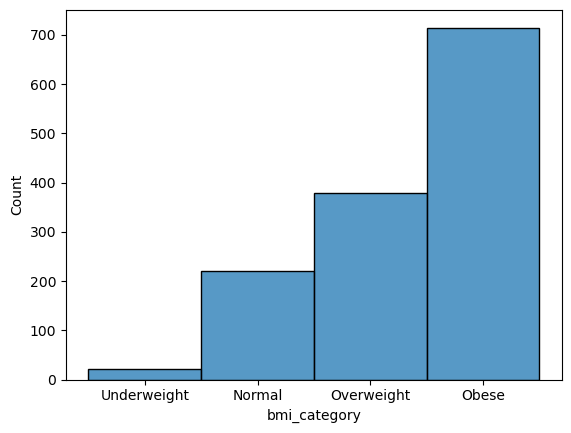

In [33]:
sns.histplot(
    df_cleaned["bmi_category"]
)

In [34]:
# processing the data to numerical form 

df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_category'])

In [35]:
df_cleaned = df_cleaned.astype(int)

In [36]:
df_cleaned.shape

(1337, 14)

In [37]:
df_cleaned.head()

age  is_female  bmi  children  is_smoker  charges  region_northeast  \
0   19          1   27         0          1    16884                 0   
1   18          0   33         1          0     1725                 0   
2   28          0   33         3          0     4449                 0   
3   33          0   22         0          0    21984                 0   
4   32          0   28         0          0     3866                 0   

   region_northwest  region_southeast  region_southwest  \
0                 0                 0                 1   
1                 0                 1                 0   
2                 0                 1                 0   
3                 1                 0                 0   
4                 1                 0                 0   

   bmi_category_Underweight  bmi_category_Normal  bmi_category_Overweight  \
0                         0                    0                        1   
1                         0                    0                        0   
2                         0                    0                        0   
3                         0                    1                        0   
4                         0                    0                        1   

   bmi_category_Obese  
0                   0  
1                   1  
2                   1  
3                   0  
4                   0

standard scaling in feature engineering 

In [38]:
df_cleaned.columns 

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Underweight', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [39]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
cols = ['age', 'children' ,'bmi']
df_cleaned[cols] = scalar.fit_transform(df_cleaned[cols])

In [40]:
df_cleaned.head()

age  is_female       bmi  children  is_smoker  charges  \
0 -1.440418          1 -0.517949 -0.909234          1    16884   
1 -1.511647          0  0.462463 -0.079442          0     1725   
2 -0.799350          0  0.462463  1.580143          0     4449   
3 -0.443201          0 -1.334960 -0.909234          0    21984   
4 -0.514431          0 -0.354547 -0.909234          0     3866   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0                 0                 0                 0                 1   
1                 0                 0                 1                 0   
2                 0                 0                 1                 0   
3                 0                 1                 0                 0   
4                 0                 1                 0                 0   

   bmi_category_Underweight  bmi_category_Normal  bmi_category_Overweight  \
0                         0                    0                        1   
1                         0                    0                        0   
2                         0                    0                        0   
3                         0                    1                        0   
4                         0                    0                        1   

   bmi_category_Obese  
0                   0  
1                   1  
2                   1  
3                   0  
4                   0

In [41]:
column = df_cleaned.columns.to_list()
column.remove("charges")
column

['age',
 'is_female',
 'bmi',
 'children',
 'is_smoker',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'bmi_category_Underweight',
 'bmi_category_Normal',
 'bmi_category_Overweight',
 'bmi_category_Obese']

In [42]:
from scipy.stats import pearsonr
corelation_df = df_cleaned[column].corrwith(df_cleaned["charges"]).sort_values(ascending=False)
corelation_df

is_smoker                   0.787234
age                         0.298309
bmi_category_Obese          0.197660
bmi                         0.196236
region_southeast            0.073577
children                    0.067390
region_northeast            0.005946
region_northwest           -0.038695
region_southwest           -0.043637
bmi_category_Underweight   -0.048225
is_female                  -0.058046
bmi_category_Normal        -0.105656
bmi_category_Overweight    -0.118280
dtype: float64

In [43]:
from scipy.stats import chi2_contingency

df_cleaned["qortile"] = pd.qcut(df_cleaned["charges"],4,labels=False)
results = []

for i in column:
    chi2,p_value,_,_ = chi2_contingency(
        pd.crosstab(
            df_cleaned[i],df_cleaned["qortile"]
        ))

    results.append(
        {
            "column ":i,
            "chi square value ":chi2,
            "P value": p_value,
            "decison":'Reject Null (keep feature)' if p_value < 0.05 else 'Accept Null (drop feature)'
        }
    )

pd.DataFrame(results).sort_values(by="P value",ascending=False)
    
    

column   chi square value         P value  \
6           region_northwest           1.134240   7.688154e-01   
11   bmi_category_Overweight           4.201575   2.405042e-01   
10       bmi_category_Normal           4.263673   2.343638e-01   
9   bmi_category_Underweight           4.384749   2.228037e-01   
8           region_southwest           5.091893   1.651906e-01   
5           region_northeast           6.438442   9.212206e-02   
12        bmi_category_Obese           7.654464   5.371967e-02   
2                        bmi         144.758888   1.727841e-02   
1                  is_female          10.258784   1.648974e-02   
7           region_southeast          15.998167   1.134966e-03   
3                   children         138.659313   4.230749e-22   
4                  is_smoker         848.219178  1.507478e-183   
0                        age        1509.130250  4.230603e-229   

                       decison  
6   Accept Null (drop feature)  
11  Accept Null (drop feature)  
10  Accept Null (drop feature)  
9   Accept Null (drop feature)  
8   Accept Null (drop feature)  
5   Accept Null (drop feature)  
12  Accept Null (drop feature)  
2   Reject Null (keep feature)  
1   Reject Null (keep feature)  
7   Reject Null (keep feature)  
3   Reject Null (keep feature)  
4   Reject Null (keep feature)  
0   Reject Null (keep feature)

In [44]:
final_dataframe = df_cleaned[["age","is_smoker","children","region_southeast","is_female","bmi"]]

In [46]:
final_dataframe

age  is_smoker  children  region_southeast  is_female       bmi
0    -1.440418          1 -0.909234                 0          1 -0.517949
1    -1.511647          0 -0.079442                 1          0  0.462463
2    -0.799350          0  1.580143                 1          0  0.462463
3    -0.443201          0 -0.909234                 0          0 -1.334960
4    -0.514431          0 -0.909234                 0          0 -0.354547
...        ...        ...       ...               ...        ...       ...
1333  0.767704          0  1.580143                 0          0 -0.027743
1334 -1.511647          0 -0.909234                 0          1  0.135659
1335 -1.511647          0 -0.909234                 1          1  0.952670
1336 -1.297958          0 -0.909234                 0          1 -0.844753
1337  1.551231          1 -0.909234                 0          1 -0.191145

[1337 rows x 6 columns]